# Visualizing Titanic Data

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [20]:
# first, need our imports and to grab the data
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# what's in the data?
! ls data/
df = pd.read_csv('data/titanic.csv')

Austin_Animal_Center_Intakes_10-08-20.csv
Austin_Animal_Center_Outcomes_10-14-20.csv
titanic.csv


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [25]:
# Need to grab last names ... but how?
#isolate last name the [0] indicates that this is the first item we are trying to split for
df['Name'].map(lambda x: x.split(sep=',')[0]).head

In [7]:
#different way

In [8]:
ln_list = []
for row in df.index:
    ln = df['Name'].str.split(",")[row][0]
    ln_list.append(ln)
ln_list[:5]

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen']

`groupby` or `value_counts`?

In [27]:
#see above, differnt ways to get the last names

df['Last Name'] = pd.Series((name[0] for name in df['Name'].str.split(",")))

In [31]:


most_common_lastnames = df.groupby(by = 'Last Name').count()[['PassengerId']].rename(columns={'PassengerId':'Count'}).sort_values(by='Count', ascending=False).head(8)


df['Last Name'].value_counts()[:8]#[:8] allows us to see the first 9 (0-8)

Andersson    9
Sage         7
Skoog        6
Goodwin      6
Carter       6
Johnson      6
Panula       6
Rice         5
Name: Last Name, dtype: int64

In [29]:
df['Last Name']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Last Name, Length: 891, dtype: object

In [30]:
df.loc[df['Last Name']=='Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


Now let's visualize:

<IPython.core.display.Javascript object>


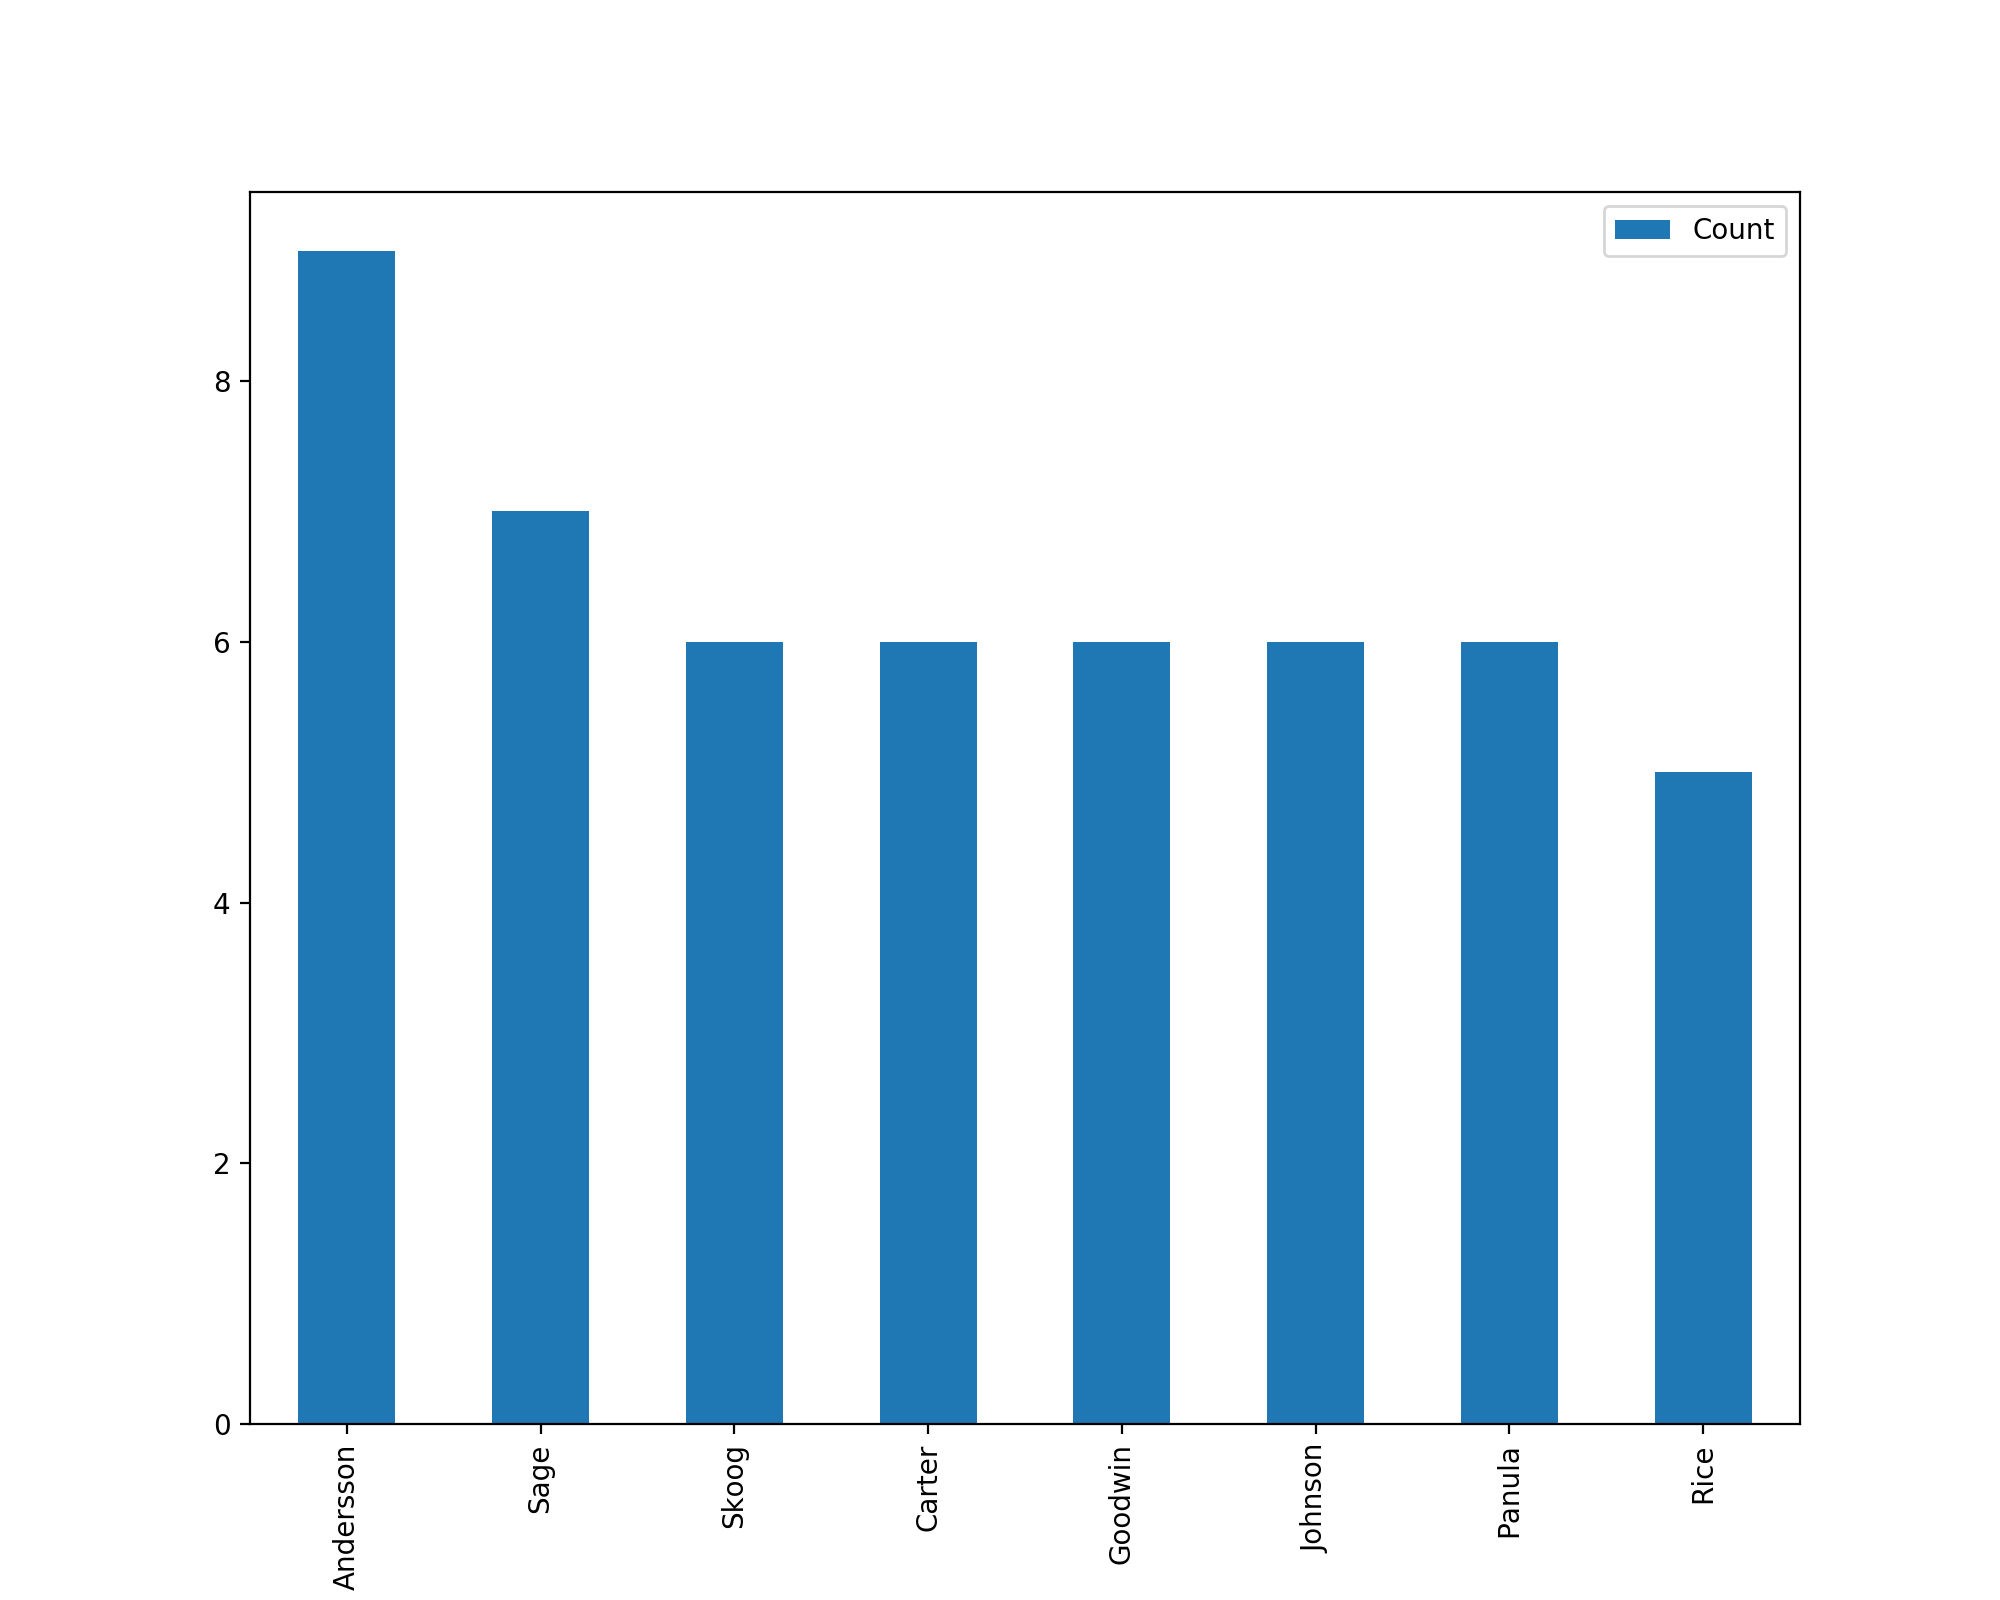

In [37]:
# Plot a bar graph of the most common last names
type(most_common_lastnames)
most_common_lastnames.plot(kind='bar', figsize=(10,8))
plt.show()

<IPython.core.display.Javascript object>


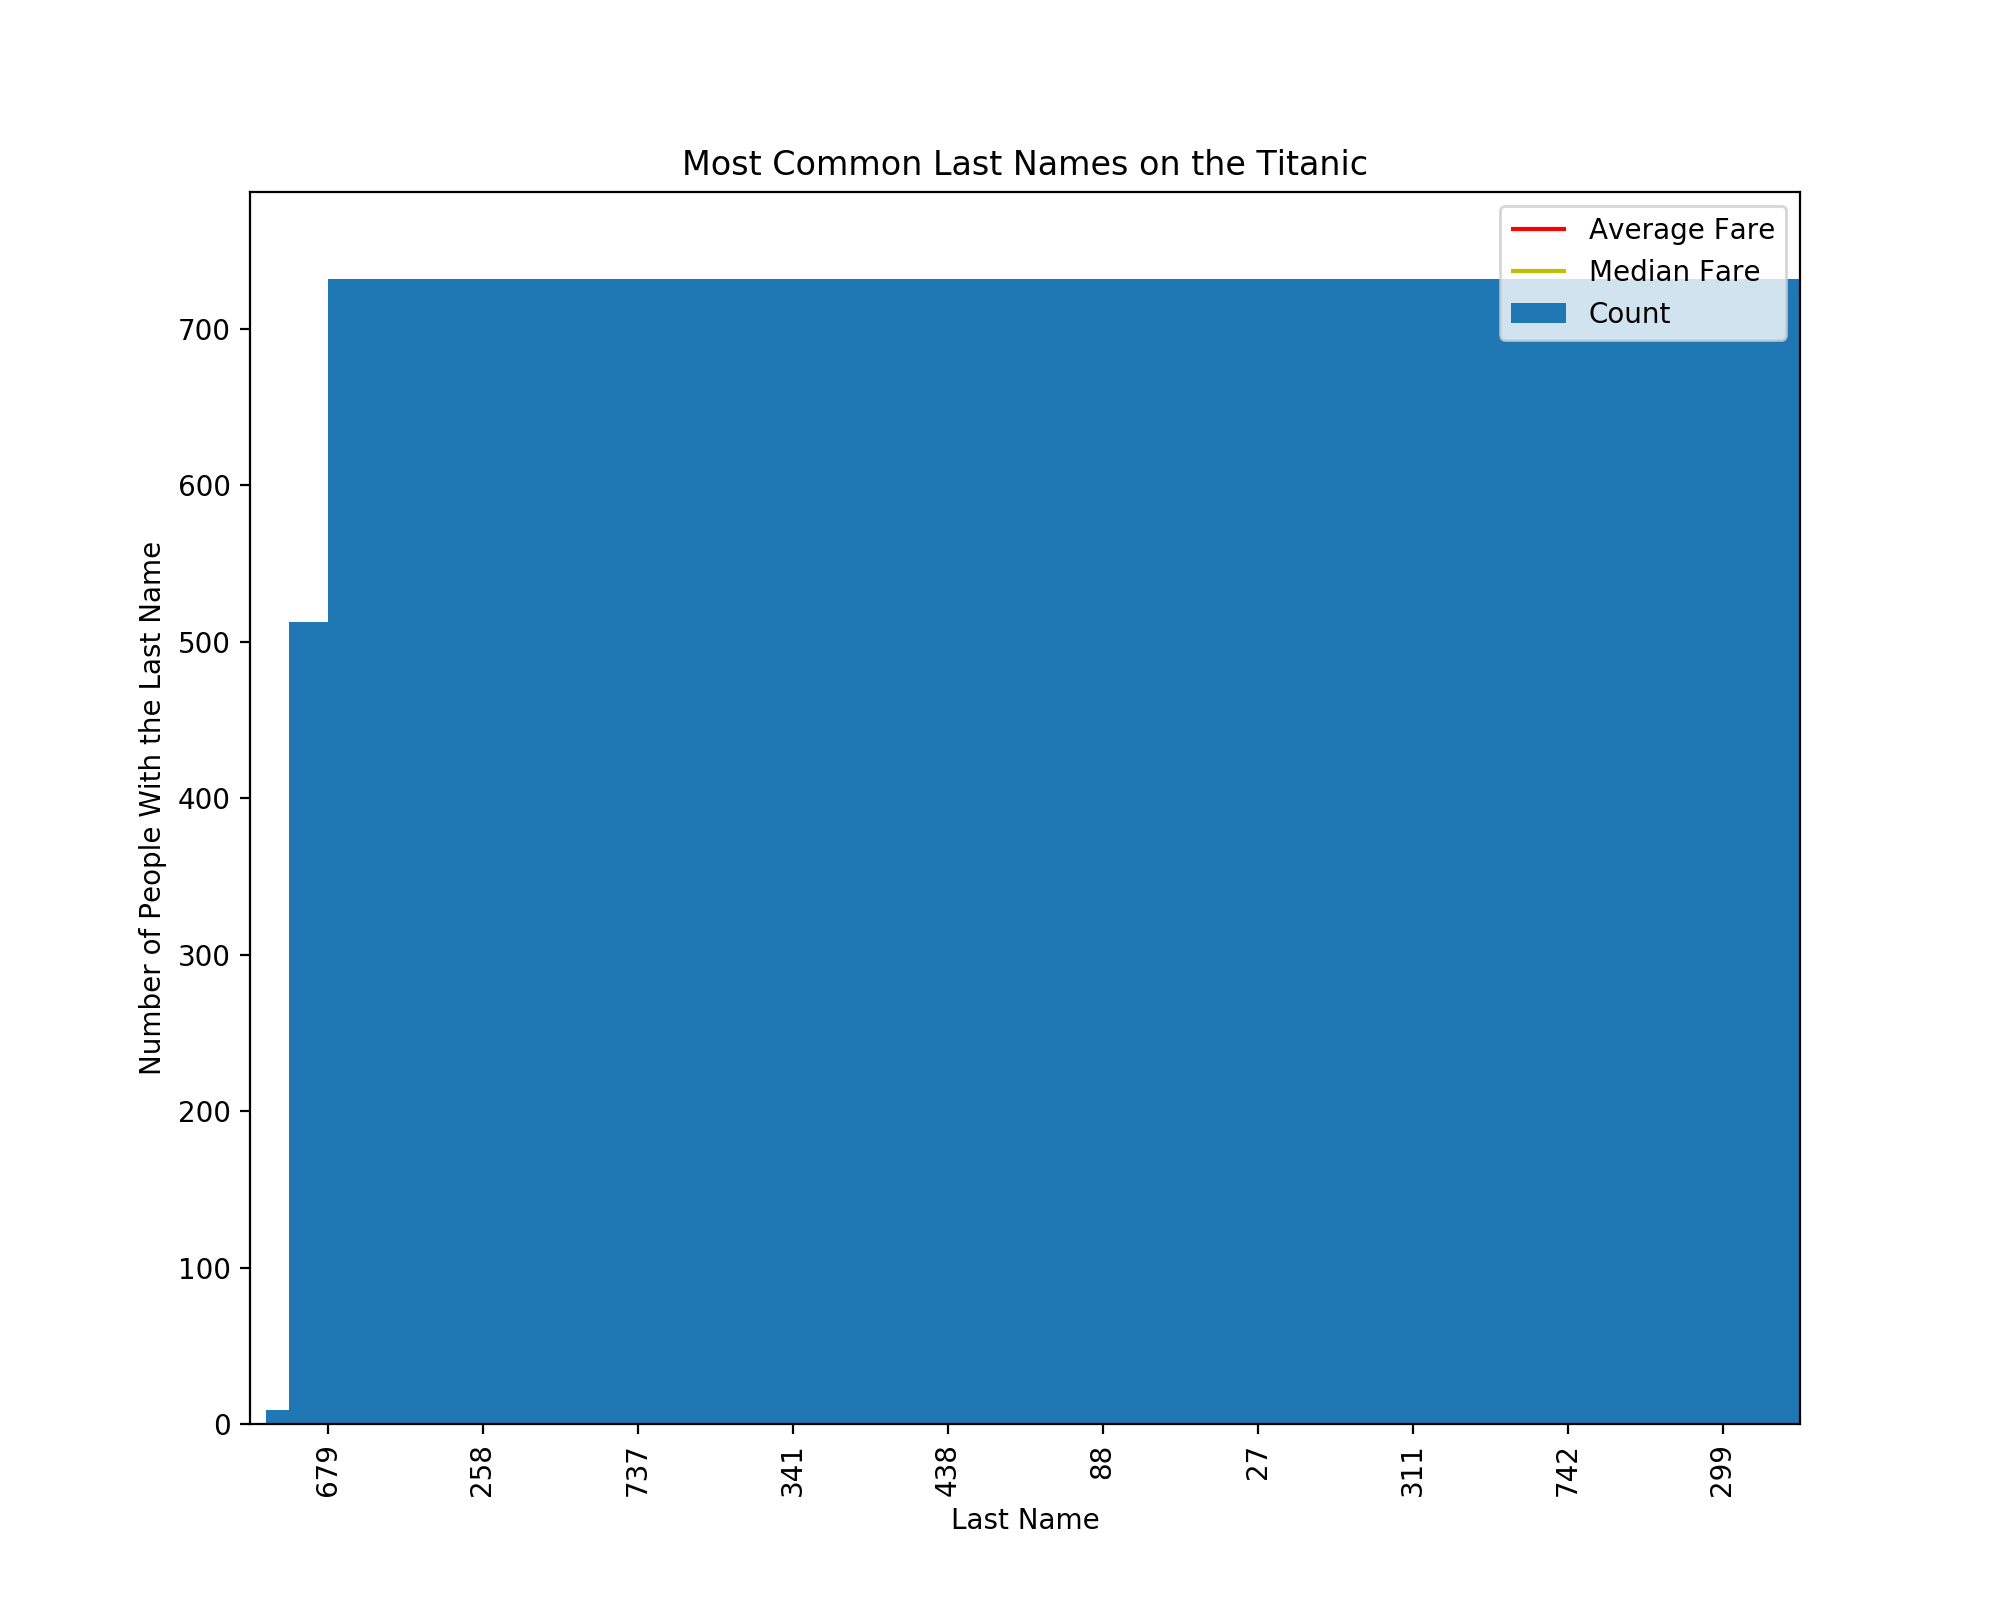

In [39]:
# Plot a bar graph of the most common last names (pretty version)
plt.figure(figsize=(10,8))
plt.bar(x=most_common_lastnames.index, height=most_common_lastnames['Count'], label='Count')
plt.title('Most Common Last Names on the Titanic')
plt.ylabel('Number of People With the Last Name')
plt.xlabel('Last Name')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [74]:
df['Fare'].mean()

32.204207968574636

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [42]:
most_fare = df['Fare'].sort_values(ascending=False).head(10)

#or

max_fare = df['Fare'].max()

In [43]:
most_fare

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
Name: Fare, dtype: float64

In [44]:
max_fare

512.3292

In [45]:
df.loc[df['Fare']>= df['Fare'].mean()] #shows who paid more than average

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Sloper
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,Wick
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Roebling
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Beckwith


In [47]:
df.sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune


In [48]:
top_ten_fare = df.sort_values(by='Fare', ascending=False).head(10)

And let's visualize some more!

In [49]:
# Plot a histogram - but now, let's do all fares
plt.hist(df['Fare'])
plt.vlines(x=df['Fare'].mean(), ymin=0, ymax=750, color = 'r', label='Average Fare')
plt.vlines(x=df['Fare'].median(), ymin=0, ymax=750, color = 'y', label='Median Fare')
plt.legend()
plt.show()

In [50]:
# Okay that's pretty bland, let's see if we can add more detail
df['Fare'].sort_values(ascending=False).head(10).plot(kind='bar')

In [51]:
plt.bar(x=most_fare['Name'], height=most_fare['Fare'])
plt.hlines(y=df['Fare'].mean(), xmin=-1, xmax=10, label = "Average Fare Paid", color ='y')
plt.hlines(y=df['Fare'].median(), xmin=-1, xmax=10, label = "Median Fare Paid", color='r')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Name')
plt.ylabel('Fare (in dollars)')
plt.title('Top Fare Payers on Titanic')
plt.show()

KeyError: 'Name'

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [75]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

<IPython.core.display.Javascript object>


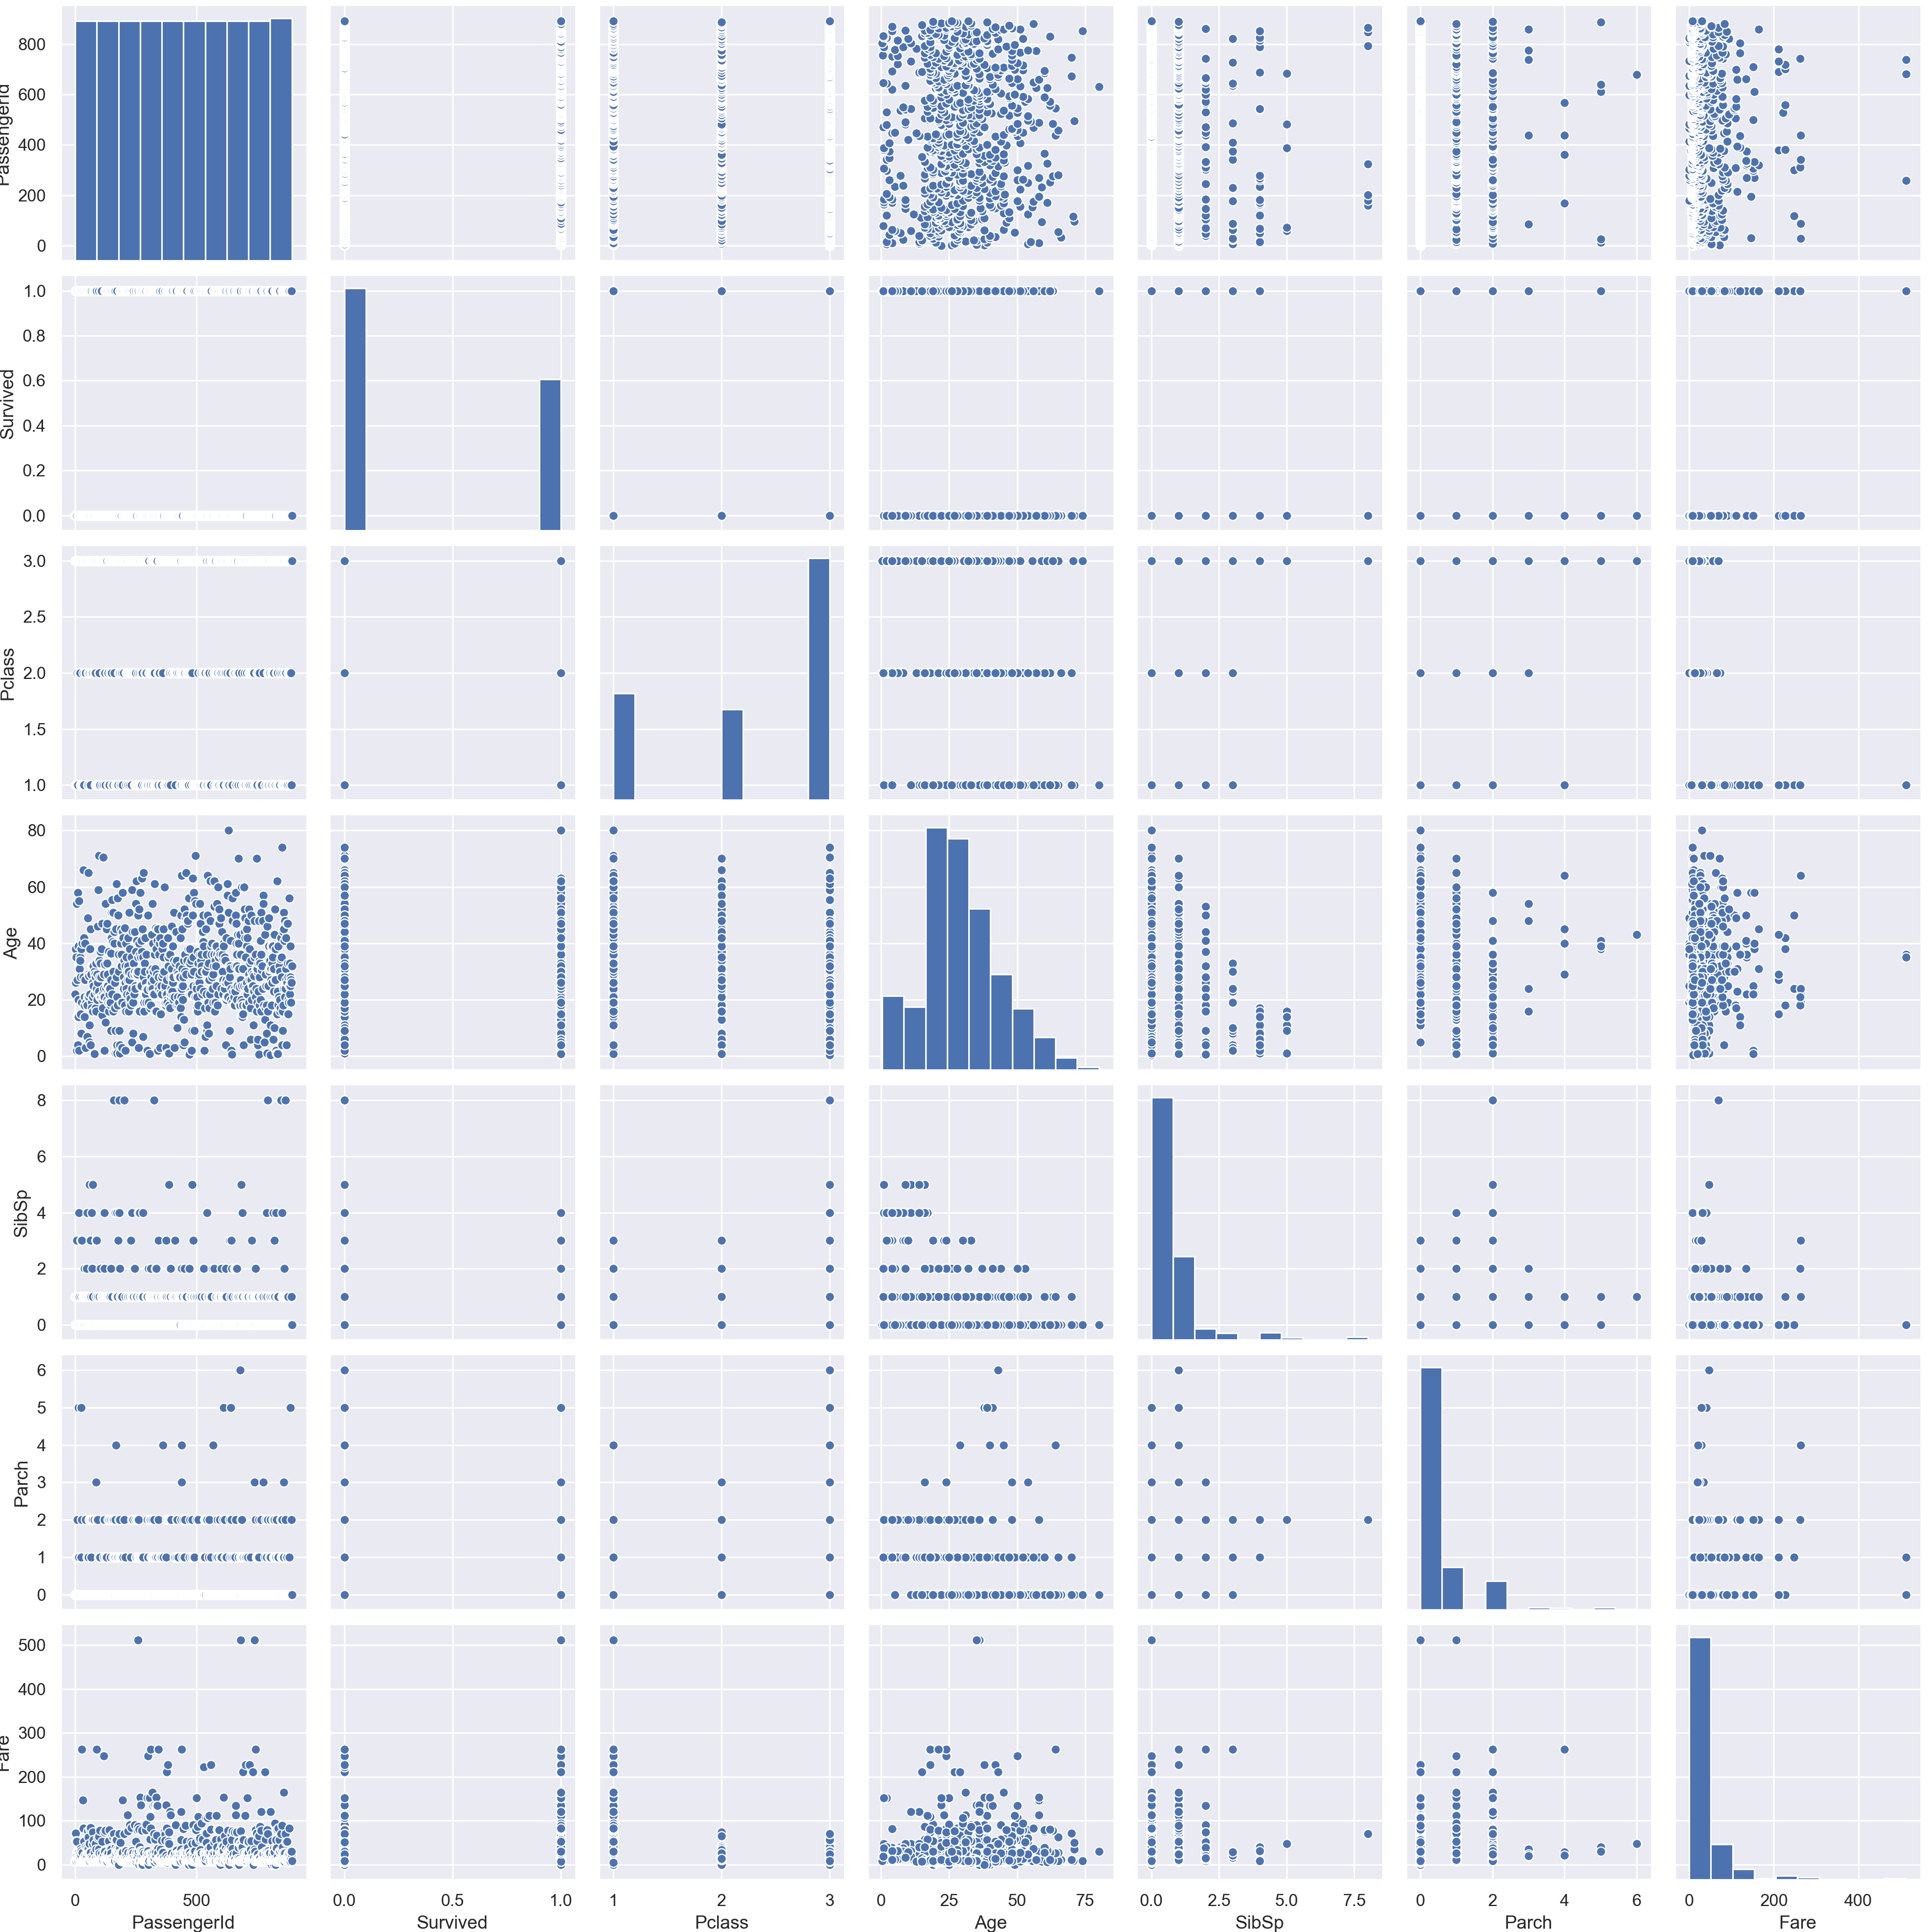

In [76]:
# We've mentioned pairplots, let's take a look...
sns.pairplot(df)

<IPython.core.display.Javascript object>


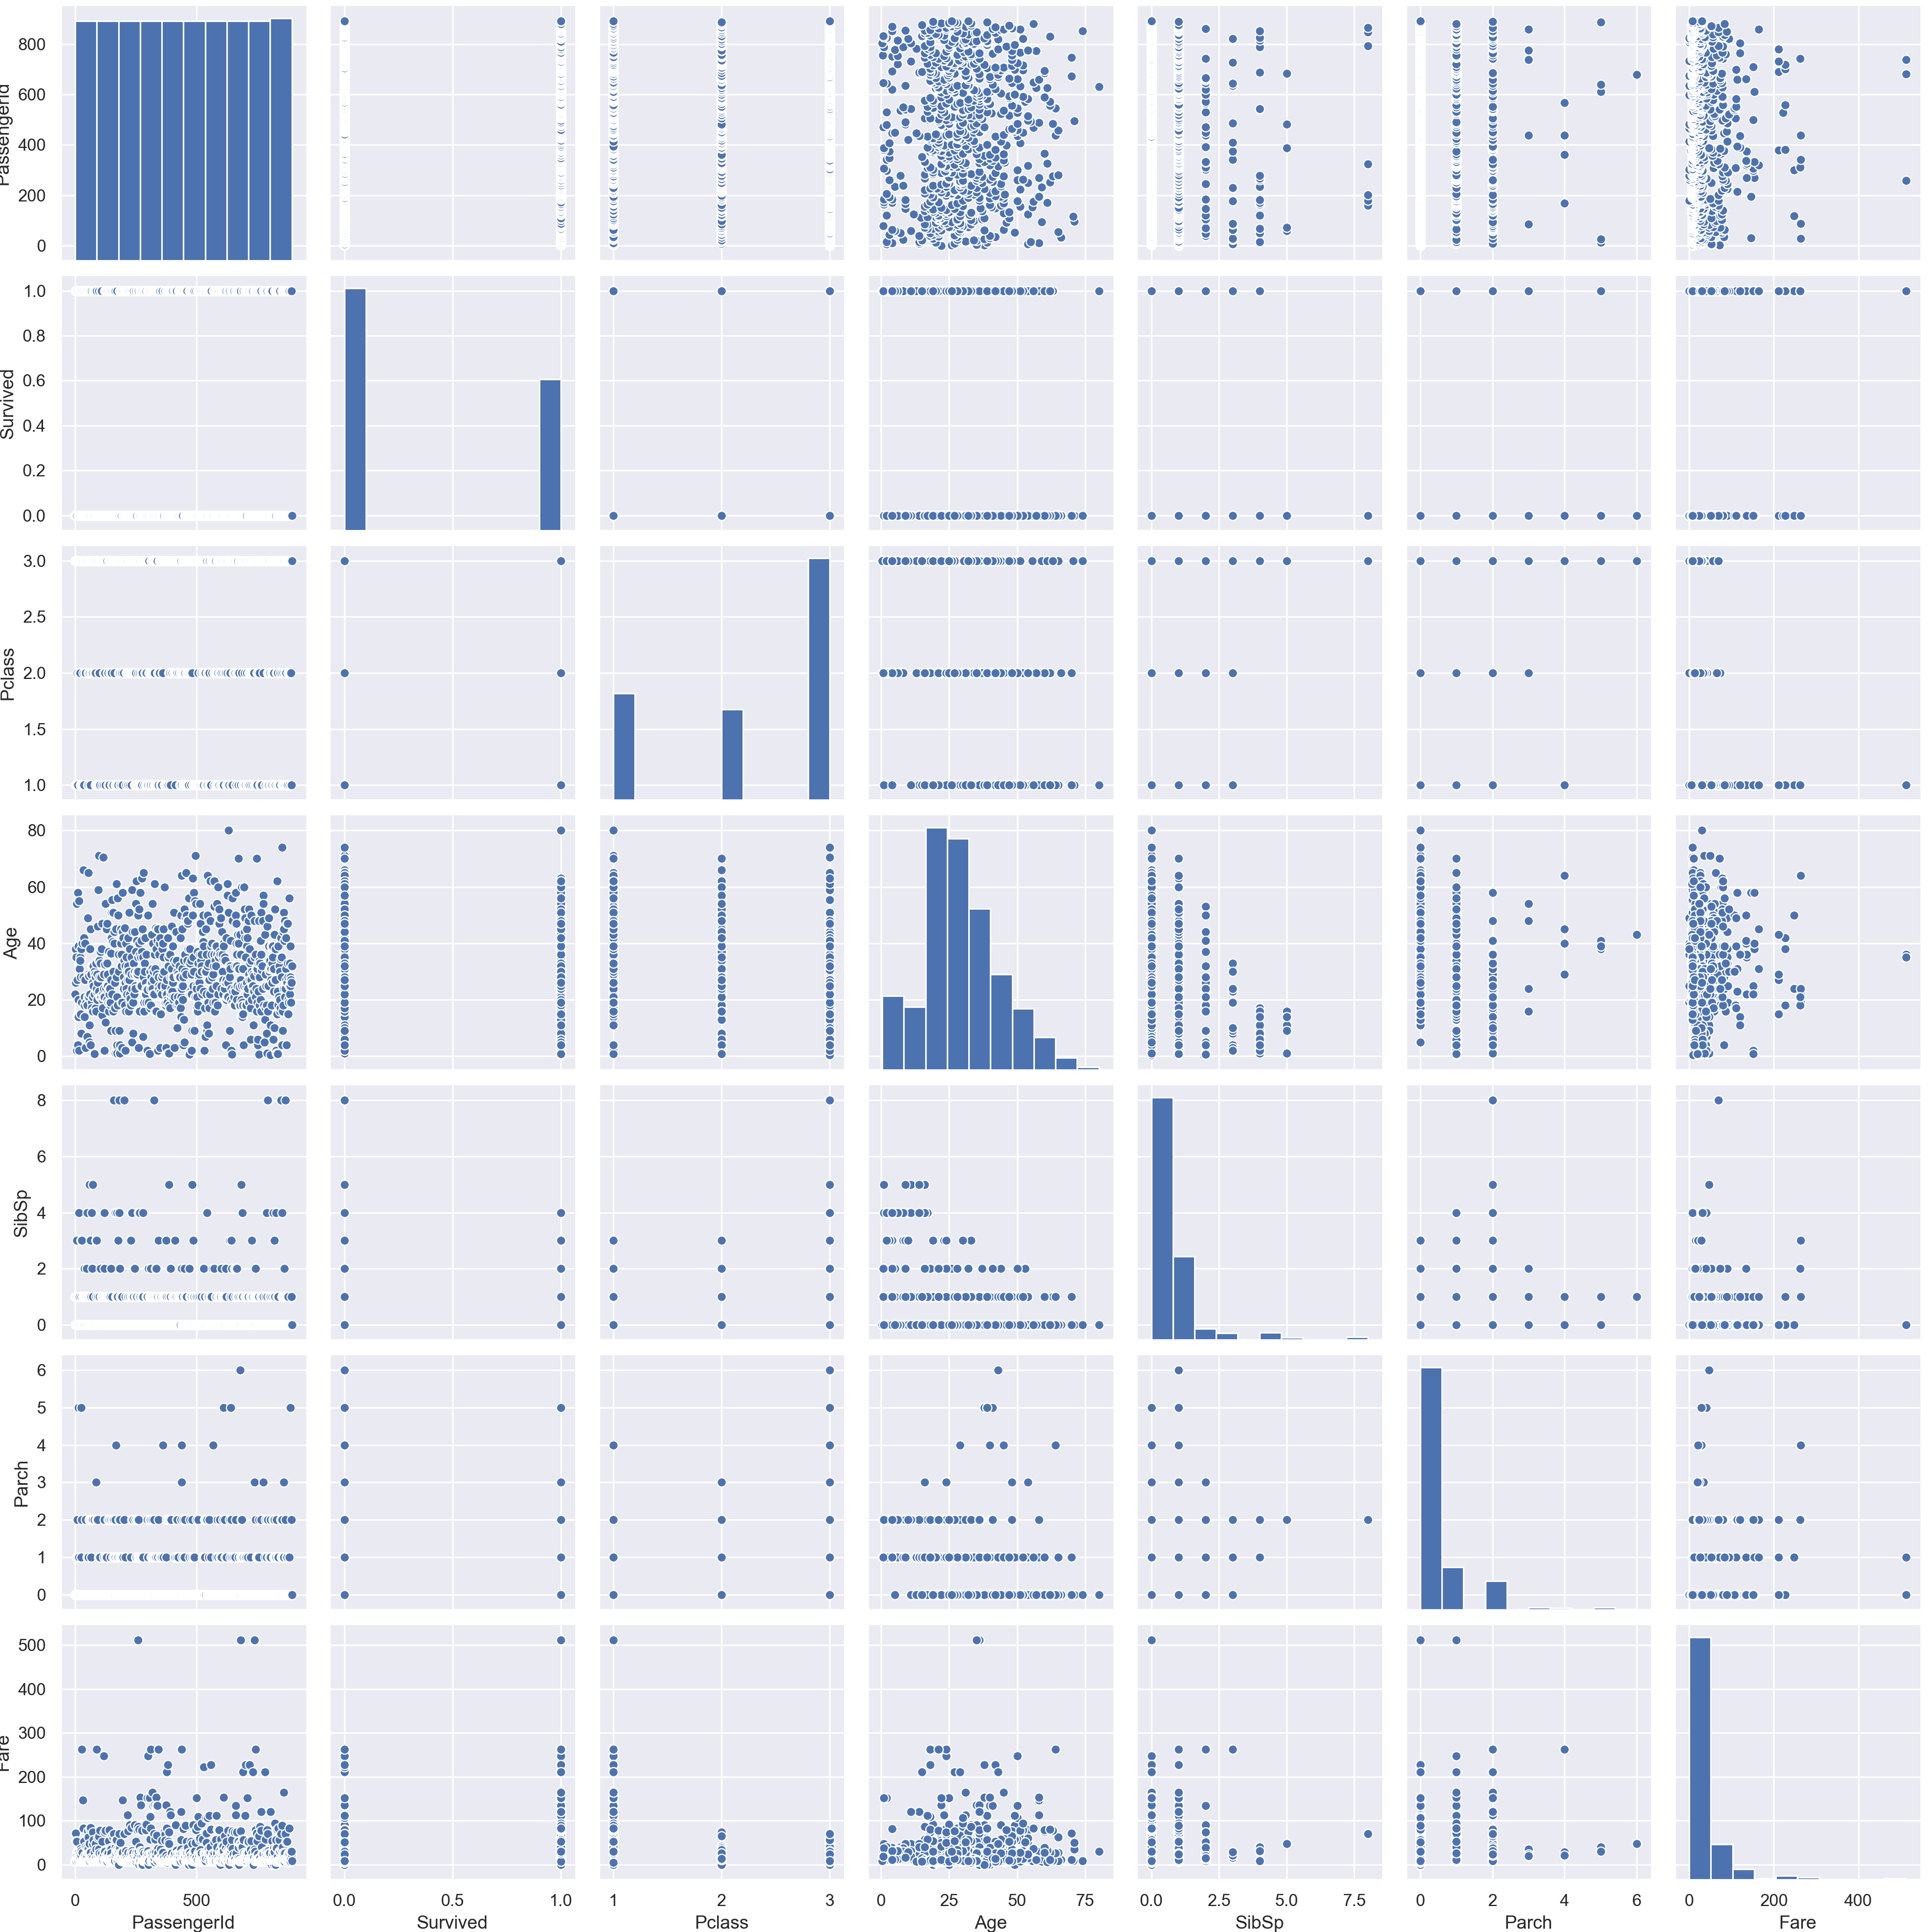

In [77]:
# Try out a swarm plot with class and age
sns.pairplot(df).how='Survived'

In [ ]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
